# Notebook 1 - Basic Functions of GemGIS

This is a first testing notebooks to show capabilities of GemGIS. This notebook is focused on converting spatial data created in a GIS software such as vector and raster files into usable DataFrame for GemPy.

The following geological map will be used to illustrate the functionality.

<img src="../data/Test1/task1.png" width="300">

# Import Libraries

Apart from creating a GemPyData class, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with an easy data handling. ***Currently, geopandas version 0.6.1 is the latest stable version that is supported by GemGIS***.

In [1]:
import sys
sys.path.append('../../gemgis')
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyvista as pv
import gemgis as gg
from scipy.ndimage.interpolation import map_coordinates
from mpl_toolkits.axes_grid1 import make_axes_locatable

print(gg)
print(gpd.__version__)

<module 'gemgis' from '../../gemgis\\gemgis.py'>
0.6.1


# Read Vector Files - Polygons

Geological Maps consisting of polygons can be loaded with GeoPandas. Currently, the functionality with respect to polygons is limited but will hopefully be extended. This will include vertices extraction and selection as well as styling of polygons.

In [2]:
geolmap = gpd.read_file('../../gemgis/data/Test1/geolmap1.shp')
image = rasterio.open('../data/Test1/task1.tif')
extent_polygon = gpd.read_file('../../gemgis/data/Test1/extent1.shp')
extent_points = gpd.read_file('../../gemgis/data/Test1/extent1_points.shp')

In [3]:
extent_polygon

id                                           geometry
0  None  POLYGON ((-0.000 1069.000, 972.000 1069.000, 9...

In [4]:
extent_points

id                  geometry
0  None   POINT (-0.000 1069.000)
1  None  POINT (972.000 1069.000)
2  None     POINT (972.000 0.000)
3  None      POINT (0.000 -0.000)

In [5]:
extent = gg.set_extent(gdf=extent_polygon)
extent

[-0.0, 972.0, -0.0, 1069.0]

In [6]:
extent = gg.set_extent(gdf=extent_points)
extent

[-0.0, 972.0, -0.0, 1069.0]

In [7]:
extent = gg.set_extent(0, image.read(1).shape[1], 0, image.read(1).shape[0])
extent

[0, 972, 0, 1069]

In [8]:
geolmap.crs

{'init': 'epsg:4326'}

In [9]:
geolmap.geom_type

0    Polygon
1    Polygon
2    Polygon
3    Polygon
dtype: object

(0.0, 972.0)

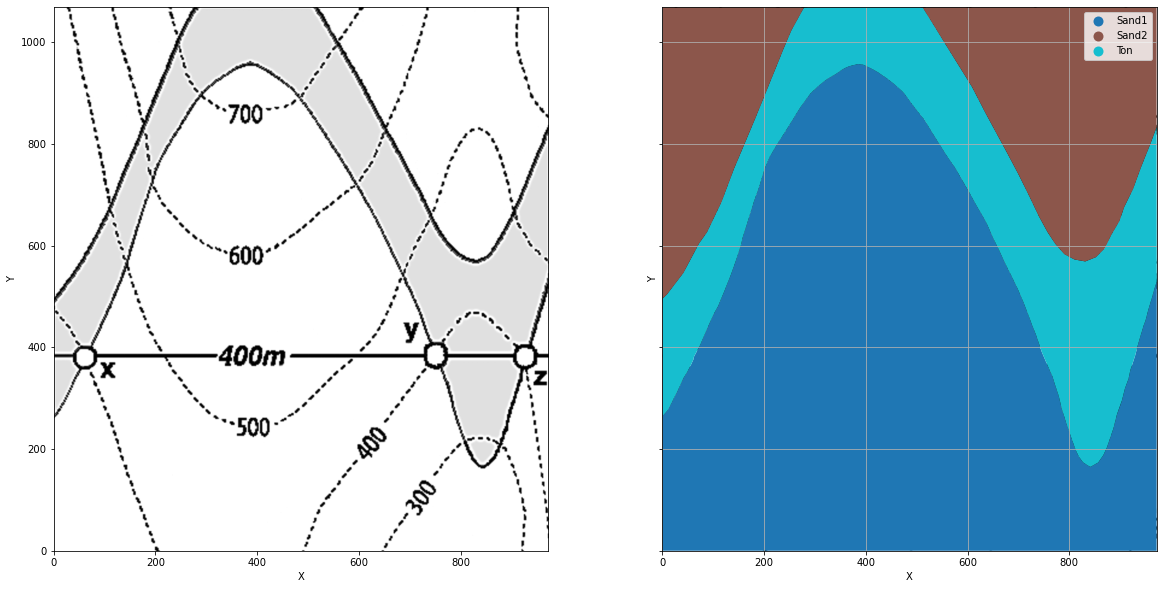

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray', extent=extent)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
geolmap.plot(ax=ax2, column = 'formation', legend = True)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Read Vector Files - Points

Interface points were selected in QGIS with their associated formation attribute. This data can now be loaded and plotted as shown below. The strength of GemGIS is it that it is working with pure GeoDataFrames providing you with their full range of functionality.

In [11]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
image = rasterio.open('../data/Test1/task1.tif')

Text(791.226498851943, 0.5, 'Y')

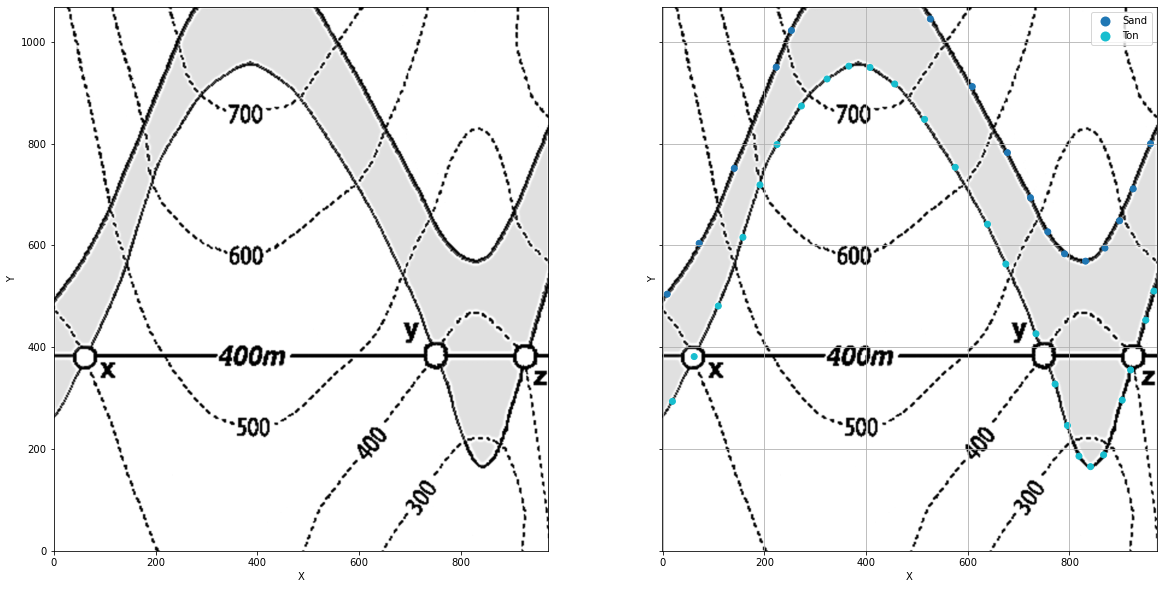

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
interfaces.plot(ax=ax2, column = 'formation', legend = True)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

The Coordinate Reference System and the Type of the Shape Files can be accessed as shown below.

In [13]:
interfaces.crs

{'init': 'epsg:4326'}

In [14]:
interfaces.geom_type.head()

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [15]:
interfaces.head()

id formation                 geometry
0  None       Ton   POINT (19.150 293.313)
1  None       Ton   POINT (61.934 381.459)
2  None       Ton  POINT (109.358 480.946)
3  None       Ton  POINT (157.812 615.999)
4  None       Ton  POINT (191.318 719.094)

## Extract X,Y coordinates

The X and Y location of the set points are stored in the geometry column. ```gg.extract_xy_values(...)``` is extracting the the X and Y coordinates of each point and returns a GeoDataFrame with the appended columns. 

In [16]:
interfaces = gg.extract_xy_values(interfaces)
interfaces.head()

id formation                 geometry           X           Y
0  None       Ton   POINT (19.150 293.313)   19.150128  293.313485
1  None       Ton   POINT (61.934 381.459)   61.934367  381.459326
2  None       Ton  POINT (109.358 480.946)  109.357860  480.945568
3  None       Ton  POINT (157.812 615.999)  157.812299  615.999430
4  None       Ton  POINT (191.318 719.094)  191.318028  719.093981

In [17]:
ints = gg.extract_xy_values(interfaces, inplace=True)
ints.head()

ints is interfaces

True

# Load Vector Data - LineString - Topography

A line shape file digitizing contour lines was created in QGIS. The corresponding entry in the GeoDataFrame is a line string containing a list of coordinates of the vertices. Each line was attributed the according height value. 

In [18]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')

Text(791.1840570646231, 0.5, 'Y')

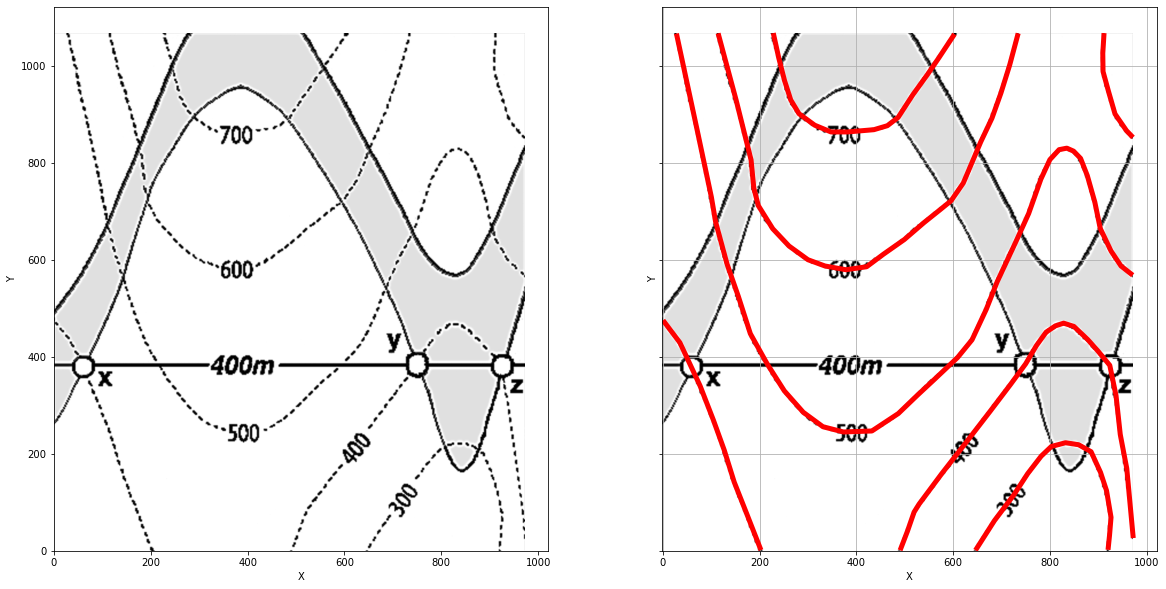

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax2, color = 'red', linewidth=5)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

The Coordinate Reference System and the Type of the Shape Files can be accessed as shown below.

In [20]:
topo.crs

{'init': 'epsg:4326'}

In [21]:
topo.geom_type.head()

0    LineString
1    LineString
2    LineString
3    LineString
4    LineString
dtype: object

In [22]:
topo.head()

id    Z                                           geometry
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....
1  None  300  LINESTRING (645.965 0.525, 685.141 61.866, 724...
2  None  400  LINESTRING (490.292 0.525, 505.756 40.732, 519...
3  None  600  LINESTRING (911.433 1068.585, 908.856 1026.831...
4  None  700  LINESTRING (228.432 1068.585, 239.772 1017.037...

## Extract X,Y coordinates

The X and Y location of the set points are stored in the geometry column within the Linestrings. gg.extract_xy_values(...) is extracting the the X and Y coordinates of each point in each Linestring and returns a GeoDataFrame with the appended columns. The gdf/df was exploded so that each point in each Linestring is now represented by one row.

In [23]:
topo = gg.extract_xy_values(topo)
topo.head()

id    Z                                           geometry  \
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   

                                     points           X           Y  
0  (0.7408806771479846, 475.44101474698454)    0.740881  475.441015  
0    (35.62873136073459, 429.2469161566801)   35.628731  429.246916  
0    (77.30033078835194, 340.0890755208477)   77.300331  340.089076  
0  (104.75836141895252, 269.34426719024157)  104.758361  269.344267  
0  (127.04782157791061, 207.64445718500974)  127.047822  207.644457

## Plot Contour Lines with PyVista

PyVista is the default 3D plotting library for GemPy. In order to get acquainted with the functionality of PyVista, simple plots of the input data are being created. A plot of the contour lines is shown below. Firstly, a plotter ```p``` is created. By passing ```notebook=True```, the resulting plot will be shown in the notebook below. ```notebook=False``` will open a new interactive window. It can be closed again by pressing 'Q' With ```p.camera_position```, the position of the camera for a plot within the notebook can be changed. 

***Hint:*** Open an interactive window and adjust the plot to a position that you like. Close the window again and you will see the camera position before you closed the window. Now paste these values into the cell and execute the cell to show the plot in the notebook. The plot is now viewed from the camera position that was set in the interactive window.

By default, we want to set the background to white and show a grid. By passing ```p.show(screenshot ='.../path.png')```, a screenshot of the plot is saved.

The contours were loaded using ```gg.plot_contours_3d(...)```. This will load a GeoDataFrame containing LineStrings or Points and plot the contour lines. Do not forget to pass the name of the plotter.

***Feel free to customize all your plots yourself!***

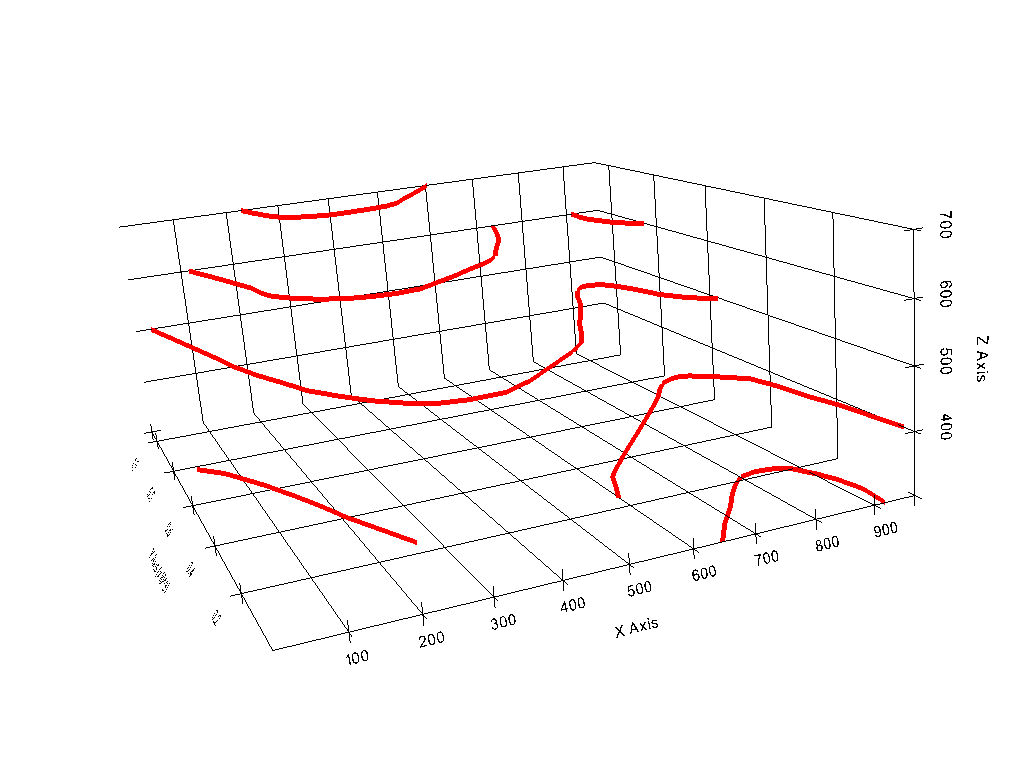

In [24]:
p = pv.Plotter(notebook =True)

gg.plot_contours_3d(topo, p, color = 'red')

p.camera_position =[(-265.62326855194965, -1658.8587591572748, 1092.2421486037606), 
                    (535.1247929028934, 496.49663272737166, 434.77098428413393), 
                    (0.17483137460875953, 0.22727872383092268, 0.9580075010907789)]

p.set_background('white')
p.show_grid(color='black')
p.show()

# Load Vector Data - LineString - Topography

A line shape file digitizing layer boundaries was created in QGIS. The corresponding entry in the GeoDataFrame is a line string containing a list of coordinates of the vertices. Each line was attributed the according formation name of the base it represents. 

In [25]:
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

Text(791.226498851943, 0.5, 'Y')

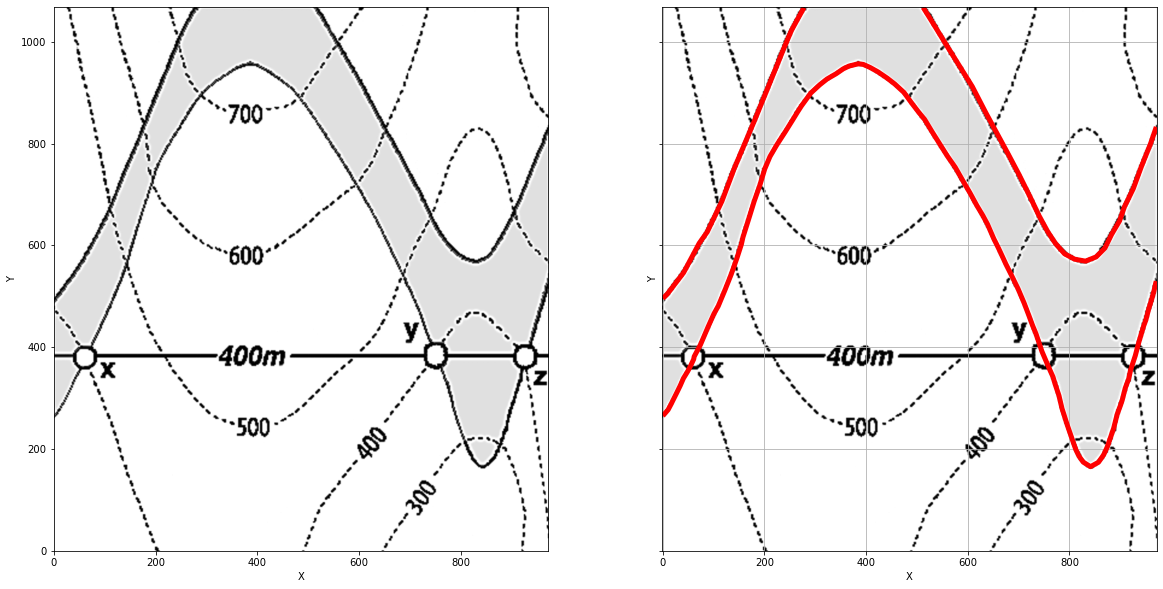

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
boundaries.plot(ax=ax2, color = 'red', linewidth=5)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

The Coordinate Reference System and the Type of the Shape Files can be accessed as shown below.

In [27]:
boundaries.crs

{'init': 'epsg:4326'}

In [28]:
boundaries.geom_type.head()

0    LineString
1    LineString
2    LineString
dtype: object

In [29]:
boundaries.head()

id formation                                           geometry
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....
1  None       Ton  LINESTRING (0.188 495.787, 8.841 504.142, 41.0...
2  None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...

## Extract X,Y coordinates

The X and Y location of the set points are stored in the geometry column within the Linestrings. gg.extract_xy_values(...) is extracting the the X and Y coordinates of each point in each Linestring and returns a GeoDataFrame with the appended columns. The gdf/df was exploded so that each point in each Linestring is now represented by one row.

In [30]:
boundaries = gg.extract_xy_values(topo)
boundaries.head()

id    Z                                           geometry  \
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   

                                     points           X           Y  
0  (0.7408806771479846, 475.44101474698454)    0.740881  475.441015  
0    (35.62873136073459, 429.2469161566801)   35.628731  429.246916  
0    (77.30033078835194, 340.0890755208477)   77.300331  340.089076  
0  (104.75836141895252, 269.34426719024157)  104.758361  269.344267  
0  (127.04782157791061, 207.64445718500974)  127.047822  207.644457

# Read Digital Elevation Model

Digital elevation models (DEMs) are read in with rasterio and will be processed as such. One typical raster file format is tif. The raster loaded here was created in ArcGIS from the contour lines shown above. We will later demonstrate how to interpolate a raster directly from contour lines and use it in GemPy. 

In [31]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
dem

<open DatasetReader name='../../gemgis/data/Test1/raster1.tif' mode='r'>

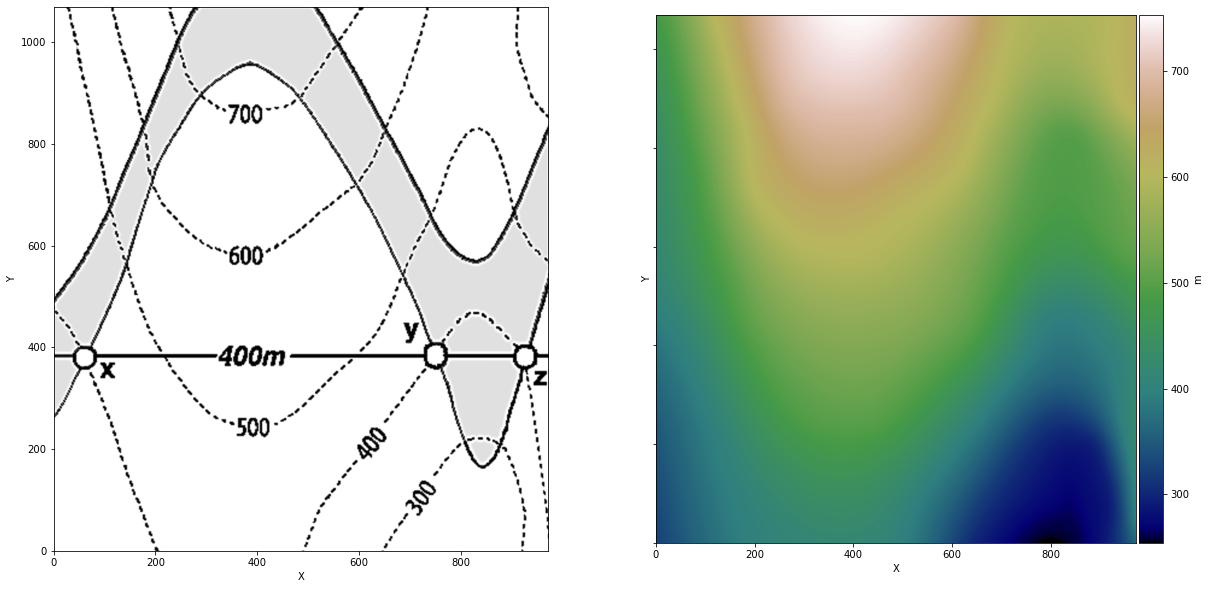

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

## Plot DEM with PyVista

The digital elevation model can be plotted as mesh in PyVista using ```gg.plot_dem_3d```. Please be aware that the DEM must have the same dimensions as the input image or the extent of the other data. Alternatively, by passing an variable to the argument ```array```, the DEM will be rescaled to fit to the extent of the geological map. 

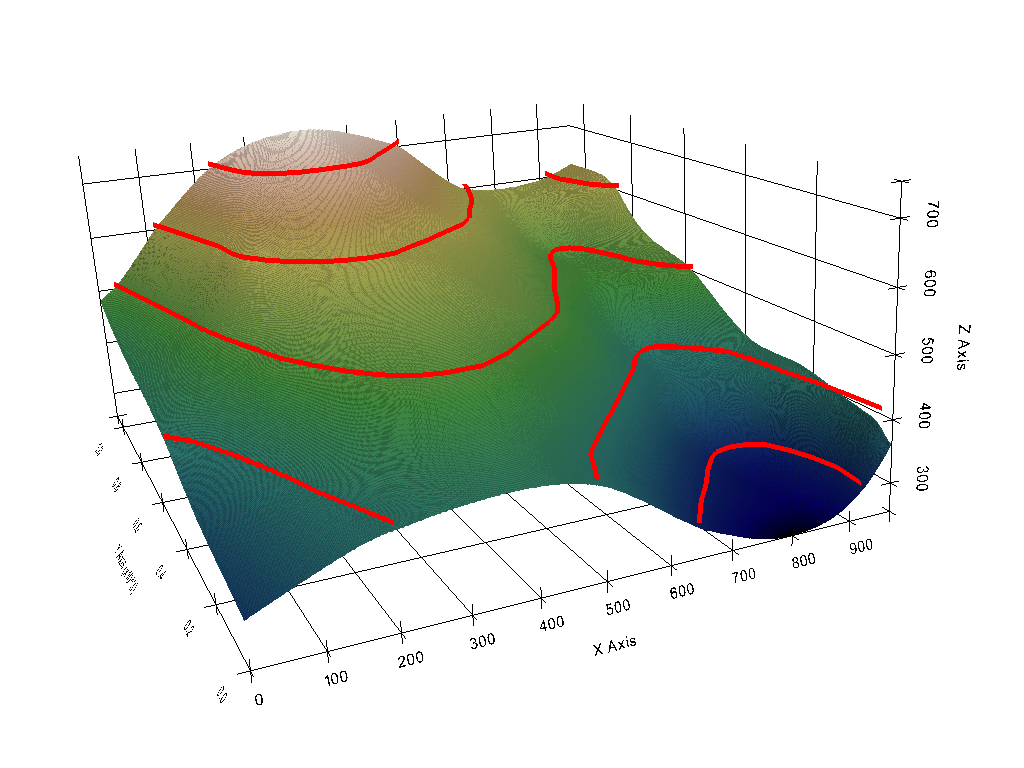

In [33]:
p = pv.Plotter(notebook =True)
# texture = pv.read_texture('../data/Test1/task1.png')
gg.plot_dem_3d(dem, p, cmap = 'gist_earth', array=image.read(1))
gg.plot_contours_3d(topo, p, color = 'red', add_to_Z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]

p.set_background('white')
p.show_grid(color='black')
p.show()

The Coordinate Reference System and the Type of the Shape Files can be accessed as shown below.

In [34]:
dem.crs

CRS.from_dict(init='epsg:4326')

# Extracting height information from DEM

Using the interfaces shape file and the DEM, the height information of the points, assuming they were recorded on the surface, can be obtained from the DEM by using ```gg.extract_z_values(...)```.

In [35]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [36]:
interfaces = gg.extract_z_values(interfaces, dem)
interfaces.head()

id formation                 geometry           X           Y           Z
0  None       Ton   POINT (19.150 293.313)   19.150128  293.313485  364.994873
1  None       Ton   POINT (61.934 381.459)   61.934367  381.459326  400.343597
2  None       Ton  POINT (109.358 480.946)  109.357860  480.945568  459.549316
3  None       Ton  POINT (157.812 615.999)  157.812299  615.999430  525.691040
4  None       Ton  POINT (191.318 719.094)  191.318028  719.093981  597.632507

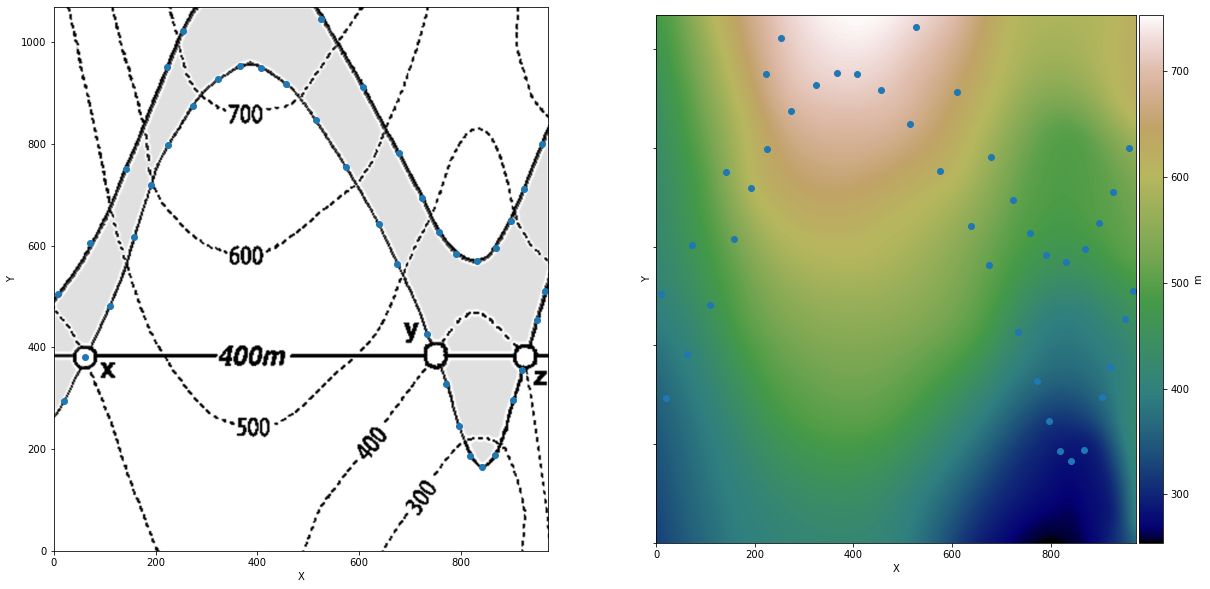

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
interfaces.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])
interfaces.plot(ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [38]:
boundaries.head()

id formation                                           geometry
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....
1  None       Ton  LINESTRING (0.188 495.787, 8.841 504.142, 41.0...
2  None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...

In [39]:
boundaries = gg.extract_xy_values(boundaries)
boundaries

id formation                                           geometry  \
0   None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0   None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0   None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0   None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0   None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
..   ...       ...                                                ...   
2   None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...   
2   None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...   
2   None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...   
2   None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...   
2   None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...   

                                     points           X            Y  
0   (0.256327195431048, 264.86214748436396)    0.256327   264.862147  
0   (10.59346813871597, 276.73370778641777)   10.593468   276.733708  
0    (17.134940141888464, 289.089821570188)   17.134940   289.089822  
0    (19.150128045807676, 293.313485355882)   19.150128   293.313485  
0     (27.79511673965105, 310.571692592952)   27.795117   310.571693  
..                                      ...         ...          ...  
2     (636.0233035161142, 859.787826958076)  636.023304   859.787827  
2    (608.8509591448512, 912.3962634589865)  608.850959   912.396263  
2    (560.1099247138658, 990.6172670215257)  560.109925   990.617267  
2   (526.3753184316984, 1045.3882341089457)  526.375318  1045.388234  
2    (512.239649401046, 1067.9508285278182)  512.239649  1067.950829  

[131 rows x 6 columns]

In [40]:
boundaries = gg.extract_z_values(boundaries, dem)
boundaries.head()

id formation                                           geometry  \
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   

                                    points          X           Y           Z  
0  (0.256327195431048, 264.86214748436396)   0.256327  264.862147  353.972778  
0  (10.59346813871597, 276.73370778641777)  10.593468  276.733708  359.036316  
0   (17.134940141888464, 289.089821570188)  17.134940  289.089822  364.284973  
0   (19.150128045807676, 293.313485355882)  19.150128  293.313485  364.994873  
0    (27.79511673965105, 310.571692592952)  27.795117  310.571693  372.810364

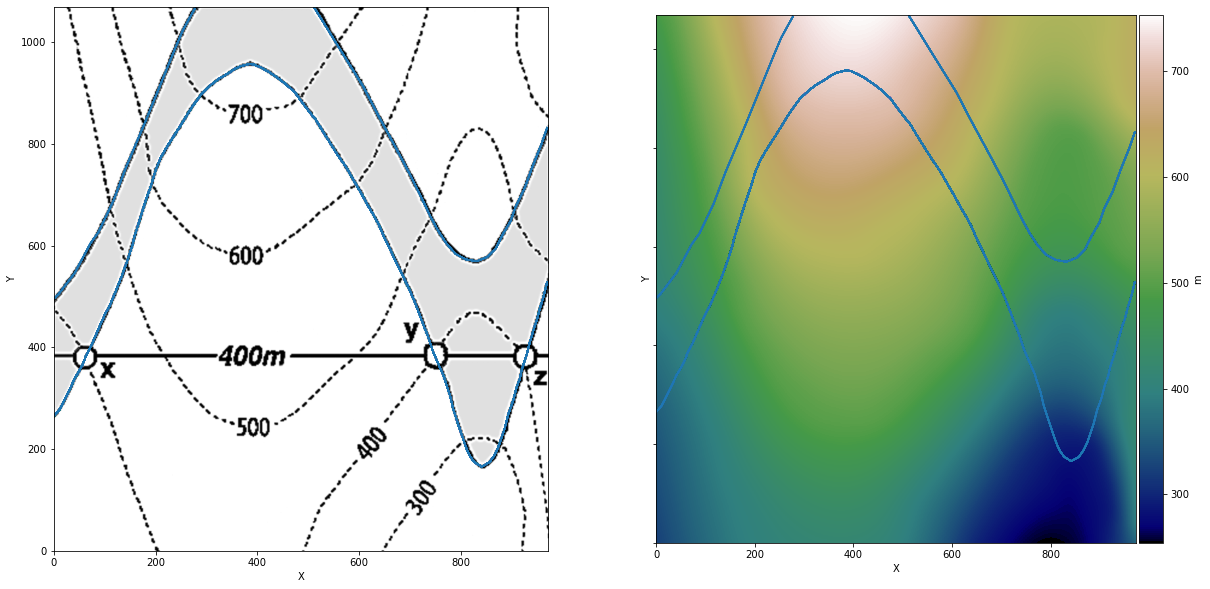

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
boundaries.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])
boundaries.plot(ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

# Plot Interfaces and Layer Boundaries with PyVista

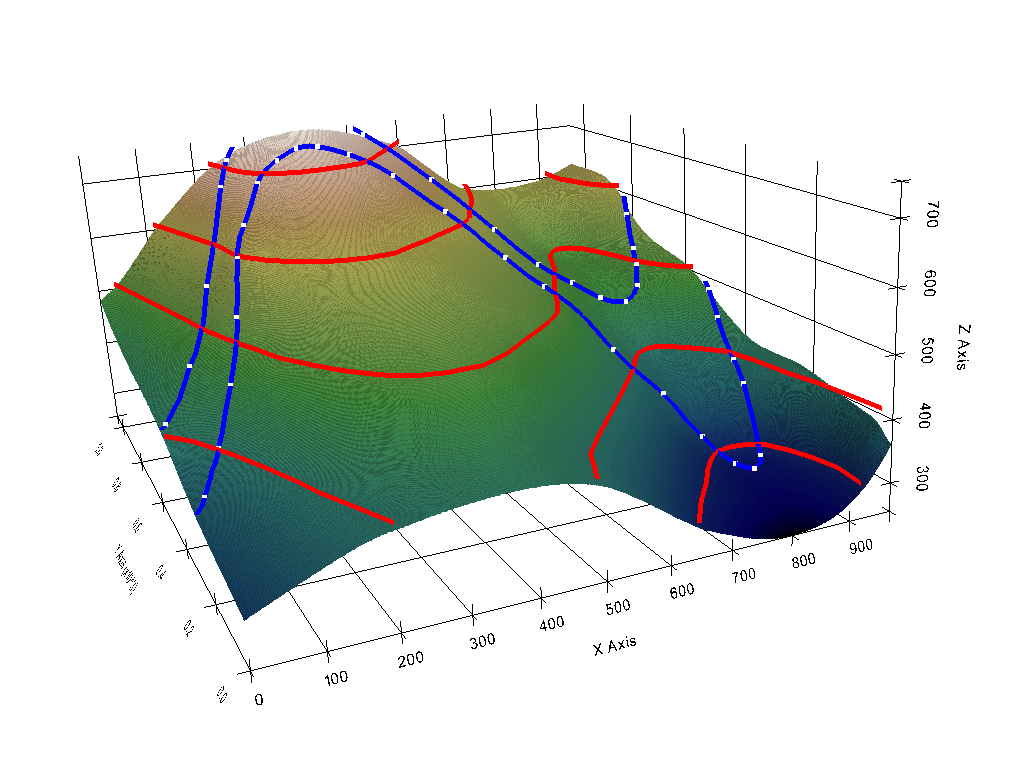

In [42]:
p = pv.Plotter(notebook =True)
# texture = pv.read_texture('../data/Test1/task1.png')
gg.plot_dem_3d(dem, p, cmap = 'gist_earth', array=image.read(1))
gg.plot_contours_3d(topo, p, color = 'red', add_to_Z = 10)
gg.plot_points_3d(interfaces, p, color = 'blue', add_to_Z = 10)
gg.plot_contours_3d(boundaries, p, color = 'blue', add_to_Z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Extract coordinates and heights from DEM

Both coordinates and heights can also be extracted directly the GeoDataFrame and the DEM with ```gg.extract_coordinates(...)```.

In [43]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [44]:
interfaces = gg.extract_coordinates(interfaces, dem)
interfaces.head()

id formation                 geometry           X           Y           Z
0  None       Ton   POINT (19.150 293.313)   19.150128  293.313485  364.994873
1  None       Ton   POINT (61.934 381.459)   61.934367  381.459326  400.343597
2  None       Ton  POINT (109.358 480.946)  109.357860  480.945568  459.549316
3  None       Ton  POINT (157.812 615.999)  157.812299  615.999430  525.691040
4  None       Ton  POINT (191.318 719.094)  191.318028  719.093981  597.632507

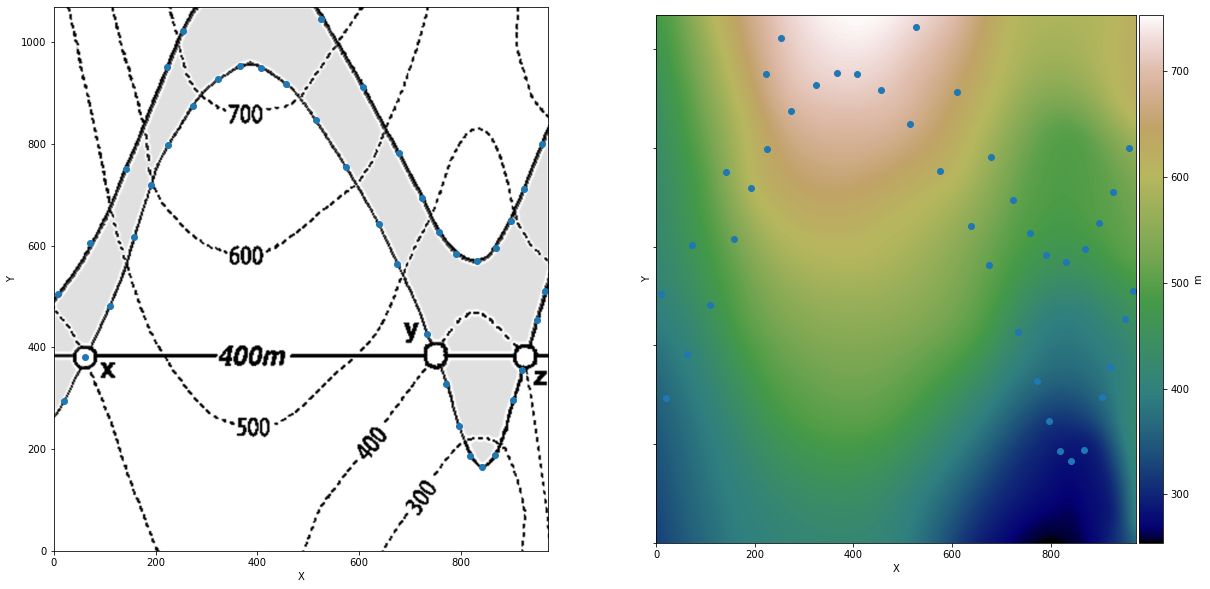

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
interfaces.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])
interfaces.plot(ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [46]:
boundaries = gg.extract_coordinates(boundaries, dem)
boundaries.head()

id formation                                           geometry  \
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   

                                    points          X           Y           Z  
0  (0.256327195431048, 264.86214748436396)   0.256327  264.862147  353.972778  
0  (10.59346813871597, 276.73370778641777)  10.593468  276.733708  359.036316  
0   (17.134940141888464, 289.089821570188)  17.134940  289.089822  364.284973  
0   (19.150128045807676, 293.313485355882)  19.150128  293.313485  364.994873  
0    (27.79511673965105, 310.571692592952)  27.795117  310.571693  372.810364

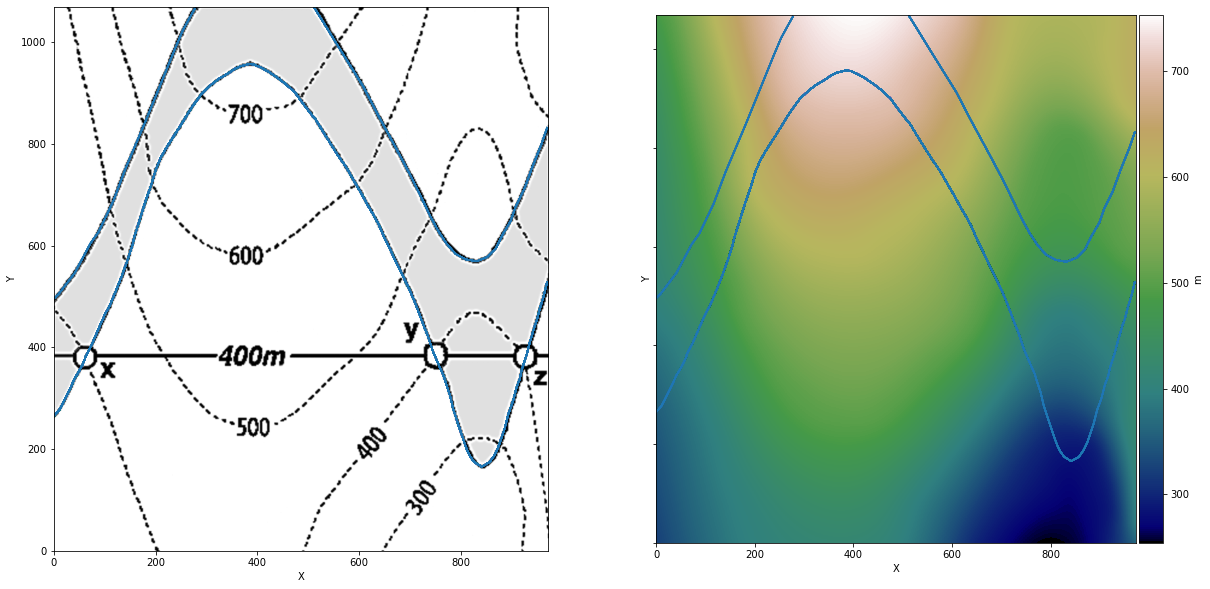

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
boundaries.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])
boundaries.plot(ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

# Define Custom Sections

Custom Sections in GemPy are defined by a start point and an end point. A shape file containing either point pairs or a straight line can directly be converted if a Section name is provided for the respective points. In the plot below, the endpoints are marked by red dots.

In [48]:
custom_sections = gpd.read_file('../../gemgis/data/Test1/customsections1.shp')

Text(791.2149687619533, 0.5, 'Y')

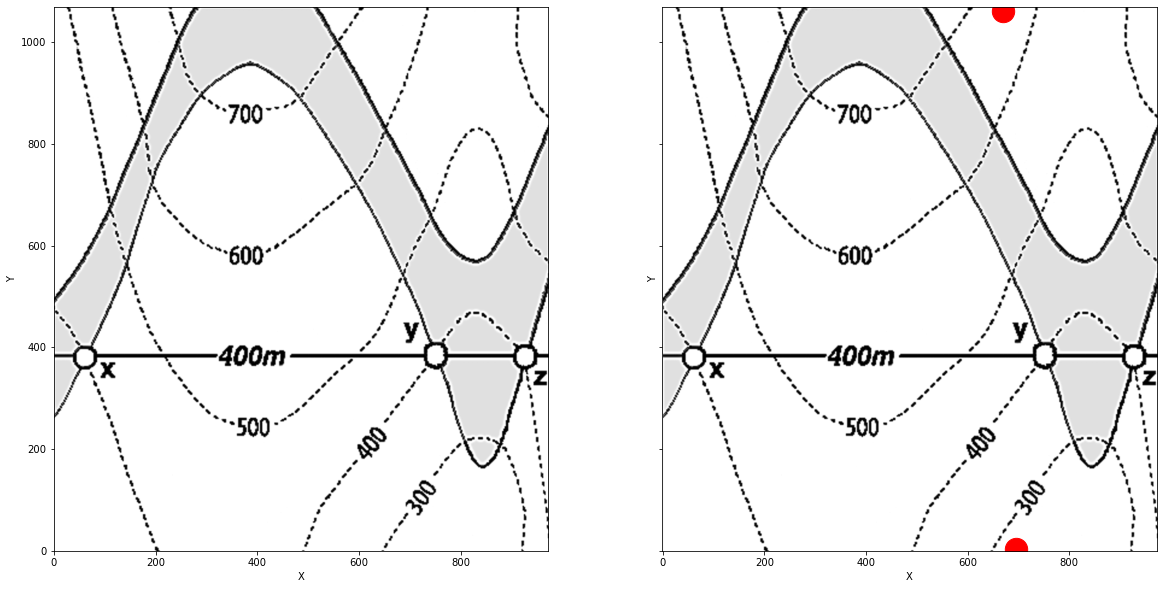

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray', extent = [0,image.shape[1], 0, image.shape[0]])
custom_sections.plot(ax=ax2, color = 'red', markersize = 500)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

## Inspection of Geometry Type

In [50]:
custom_sections.geom_type.head()

0    Point
1    Point
dtype: object

## Inspection of Custom Sections

In [51]:
custom_sections

id                  geometry
0  None     POINT (695.467 3.226)
1  None  POINT (669.284 1060.822)

## Adding a section_name to the endpoints

In [52]:
custom_sections['section_name'] = 'SectionA'
custom_sections

id                  geometry section_name
0  None     POINT (695.467 3.226)     SectionA
1  None  POINT (669.284 1060.822)     SectionA

## Creating a Section dict

In [53]:
section_dict = gg.to_section_dict(custom_sections, 'section_name')
section_dict

{'SectionA': ([695.4667461080886, 3.2262250771374283],
  [669.2840030245482, 1060.822026058724],
  [100, 80])}

In [54]:
section_dict['SectionA']

([695.4667461080886, 3.2262250771374283],
 [669.2840030245482, 1060.822026058724],
 [100, 80])

In [55]:
section_dict.values()

dict_values([([695.4667461080886, 3.2262250771374283], [669.2840030245482, 1060.822026058724], [100, 80])])

In [56]:
len(section_dict)

1

## GeoDataFrame with multiple point pairs

In [57]:
sections = pd.concat([custom_sections,custom_sections,custom_sections])
sections['section_name'].iloc[2] ='SectionB'
sections['section_name'].iloc[3] ='SectionB'
sections['section_name'].iloc[4] ='SectionC'
sections['section_name'].iloc[5] ='SectionC'
sections

C:\Users\user_abuser\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


id                  geometry section_name
0  None     POINT (695.467 3.226)     SectionA
1  None  POINT (669.284 1060.822)     SectionA
0  None     POINT (695.467 3.226)     SectionB
1  None  POINT (669.284 1060.822)     SectionB
0  None     POINT (695.467 3.226)     SectionC
1  None  POINT (669.284 1060.822)     SectionC

## Creating a Section Dict

In [58]:
section_dict = gg.to_section_dict(sections, section_column = 'section_name')
section_dict

{'SectionA': ([695.4667461080886, 3.2262250771374283],
  [669.2840030245482, 1060.822026058724],
  [100, 80]),
 'SectionB': ([695.4667461080886, 3.2262250771374283],
  [669.2840030245482, 1060.822026058724],
  [100, 80]),
 'SectionC': ([695.4667461080886, 3.2262250771374283],
  [669.2840030245482, 1060.822026058724],
  [100, 80])}

## Create custom sections from lines

In [59]:
custom_sections = gpd.read_file('../../gemgis/data/Test1/customsection1_line.shp')

Text(791.2149687619533, 0.5, 'Y')

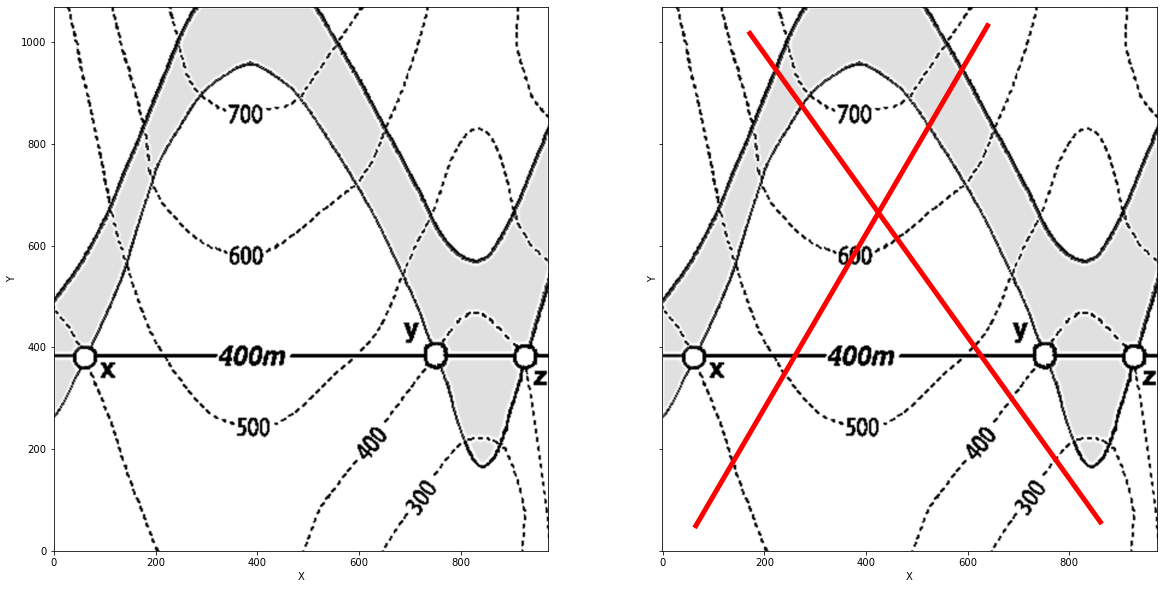

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray', extent = [0,image.shape[1], 0, image.shape[0]])
custom_sections.plot(ax=ax2, color = 'red', linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

## Inspection of Geometry Type

In [61]:
custom_sections.geom_type.head()

0    LineString
1    LineString
dtype: object

## Inspection of Custom Sections

In [62]:
custom_sections

id   section                                       geometry
0  None  Section1   LINESTRING (62.764 44.511, 641.644 1036.877)
1  None  Section2  LINESTRING (863.892 52.264, 168.719 1021.371)

In [63]:
gg.extract_xy_values(custom_sections)

id   section                                       geometry  \
0  None  Section1   LINESTRING (62.764 44.511, 641.644 1036.877)   
0  None  Section1   LINESTRING (62.764 44.511, 641.644 1036.877)   
1  None  Section2  LINESTRING (863.892 52.264, 168.719 1021.371)   
1  None  Section2  LINESTRING (863.892 52.264, 168.719 1021.371)   

                                     points           X            Y  
0   (62.76372633685696, 44.511451673794454)   62.763726    44.511452  
0   (641.6436191608124, 1036.8769822291465)  641.643619  1036.876982  
1    (863.8921494414382, 52.26430738125828)  863.892149    52.264307  
1  (168.71942100552735, 1021.3712708142193)  168.719421  1021.371271

# Create Section Dict

In [64]:
section_dict1 = gg.to_section_dict(custom_sections, section_column='section')
section_dict1

{'Section1': ([62.76372633685696, 44.511451673794454],
  [641.6436191608124, 1036.8769822291465],
  [100, 80]),
 'Section2': ([863.8921494414382, 52.26430738125828],
  [168.71942100552735, 1021.3712708142193],
  [100, 80])}

In [65]:
section_dict1['']

KeyError: ''

# Merge Section Dicts

Dictionaries can easily be merged. ***Be ware that the keys of sections in different dictionaries must not be identical!***

In [ ]:
section_dict

In [ ]:
section_dict1

In [ ]:
new_dict = dict(section_dict)
new_dict.update(section_dict1)
new_dict

# Interpolate Raster

If no digital model of a surface is present and ArcGIS is not an option, rasters can also directly be interpolated in GemGIS. Several scipy.interpolate.griddata methods were implemented for the raster interpolation. 

In [ ]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
topo.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax2)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

In [ ]:
array_linear = gg.interpolate_raster(topo)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_linear, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [ ]:
array_linear2 = gg.interpolate_raster(topo, method = 'linear')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_linear2, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [ ]:
array_cubic = gg.interpolate_raster(topo, method = 'cubic')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_cubic, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [ ]:
array_rbf = gg.interpolate_raster(topo, method = 'rbf')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_rbf, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')
np.save('../data/Test1/array_rbf.npy', array_rbf)

In [ ]:
array_rbf_linear = gg.interpolate_raster(topo, method = 'rbf', function = 'linear')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_rbf_linear, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

# Calculate Hillshades, Slope and Aspect

Hillshades, the slope and the aspect of a DEM can be calculated to firstly display topographic features and to obtain orientation information for the respective surface, respectively. 

In [ ]:
hillshades = gg.calculate_hillshades(array_rbf)
hillshades

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(array_rbf, origin='lower')
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0,array_rbf.shape[1])
ax1.set_ylim(0,array_rbf.shape[0])
fig.colorbar(arr, ax=ax1, cax=cax)
hill = ax2.imshow(hillshades, origin='lower', cmap = 'gray')
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax1.set_xlim(0,hillshades.shape[1])
ax1.set_ylim(0,hillshades.shape[0])
fig.colorbar(hill, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
slope = gg.calculate_slope(array_rbf)
slope

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
ax1.imshow(array_rbf, origin='lower')
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0,array_rbf.shape[1])
ax1.set_ylim(0,array_rbf.shape[0])
fig.colorbar(arr, ax=ax1,cax=cax)
slo = ax2.imshow(slope, origin='lower', cmap = 'RdYlBu_r', vmin=0, vmax=90)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax1.set_xlim(0,slope.shape[1])
ax1.set_ylim(0,slope.shape[0])
fig.colorbar(slo, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
aspect = gg.calculate_aspect(array_rbf)
aspect

In [ ]:
array = gg.interpolate_raster(topo, method = 'rbf', function = 'linear')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(array_rbf, origin='lower')
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0,array_rbf.shape[1])
ax1.set_ylim(0,array_rbf.shape[0])
fig.colorbar(arr, ax=ax1,cax=cax)
asp = ax2.imshow(aspect, origin='lower', cmap = 'gist_earth', vmin = 0, vmax= 360)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim(0,aspect.shape[1])
ax2.set_ylim(0,aspect.shape[0])
fig.colorbar(asp, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

In [ ]:
hillshades = gg.calculate_hillshades(dem.read(1))
hillshades

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(np.flipud(dem.read(1)), origin='lower', extent = extent)
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

fig.colorbar(arr, ax=ax1, cax=cax)
hill = ax2.imshow(np.flipud(hillshades), origin='lower', cmap = 'gray',extent = extent)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(hill, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
slope = gg.calculate_slope(dem.read(1))
slope

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(np.flipud(dem.read(1)), origin='lower', extent = extent)
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
fig.colorbar(arr, ax=ax1, cax=cax)
hill = ax2.imshow(np.flipud(slope), origin='lower', cmap = 'RdYlBu_r',extent = extent, vmin=0, vmax=90)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(hill, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
aspect = gg.calculate_aspect(dem.read(1))
aspect

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(np.flipud(dem.read(1)), origin='lower', extent = extent)
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
fig.colorbar(arr, ax=ax1, cax=cax)
hill = ax2.imshow(np.flipud(aspect), origin='lower', cmap = 'gist_earth',extent = extent, vmin=0, vmax=360)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(hill, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

# Calculating the difference between rasters

It is also possible to calculate the difference between two given rasters. If the rasters do not have the save shape, the smaller raster will be scaled accordingly. Set ```flip_array = True``` to flip the second array in case it is the wrong way around.

In [ ]:
diff = gg.calculate_difference(array_rbf, dem.read(1), flip_array=True)

In [ ]:
print(array.shape)
print(dem.read(1).shape)
print(dem.read(1).min())
print(dem.read(1).max())

In [ ]:
plt.imshow(np.flipud(diff), vmin= -20, vmax=20)
plt.colorbar()

# Extracting height information from DEM

Using the interfaces shape file and the DEM, the height information of the points, assuming they were recorded on the surface, can be obtained from the DEM by using ```gg.extract_z_values(...)```.

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [ ]:
interfaces1 = gg.extract_z_values(interfaces, dem)
interfaces1.head()

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [ ]:
interfaces2 = gg.extract_z_values(interfaces, array_rbf, extent = extent)
interfaces2.head()

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [ ]:
interfaces3 = gg.extract_coordinates(interfaces, array_rbf, extent = extent)
interfaces3.head()

# Sample Orientations from Raster

In [ ]:
point = [750, 750]
value = gg.sample_from_raster(array_rbf, extent, point)
value

In [ ]:
value, point = gg.sample_from_raster_randomly(array_rbf, extent)
value, point

In [ ]:
np.random.seed(1)

orientations = gg.sample_orientations_from_raster(array_rbf, extent, random_samples=10, formation='Mudstone')
orientations

In [ ]:
plt.imshow(array_rbf, origin='lower', extent = extent)
plt.scatter(orientations.X, orientations.Y, color = 'red')
plt.grid()

In [ ]:
value = gg.sample_orientations_from_raster(array_rbf, extent, random_samples=1)
value

In [ ]:
value= gg.sample_orientations_from_raster(array_rbf, extent, points = [[200,300],[300,400],[400,500]], formation = 'Sandstone')
value

In [ ]:
value= gg.sample_orientations_from_raster(array_rbf, extent, points = [[200,300],[300,400]])
value

In [ ]:
df= gg.sample_orientations_from_raster(array_rbf, extent, points = [200,300])
df

In [ ]:
df = gg.sample_orientations_from_raster(array_rbf, extent, points=[205,305])
df

# Sample Interfaces from Raster

In [ ]:
np.random.seed(2)

interfaces = gg.sample_interfaces_from_raster(array_rbf, extent, random_samples=10, formation='Mudstone')
interfaces

In [ ]:
plt.imshow(array_rbf, origin='lower', extent = extent)
plt.scatter(interfaces.X, interfaces.Y, color = 'red')
plt.grid()

In [ ]:
value = gg.sample_interfaces_from_raster(array_rbf, extent, random_samples=1)
value

In [ ]:
value= gg.sample_interfaces_from_raster(array_rbf, extent, points = [[200,300],[300,400],[400,500]], formation = 'Sandstone')
value

In [ ]:
value= gg.sample_interfaces_from_raster(array_rbf, extent, points = [[200,300],[300,400]])
value

In [ ]:
df= gg.sample_interfaces_from_raster(array_rbf, extent, points = [200,300])
df

In [ ]:
df = gg.sample_interfaces_from_raster(array_rbf, extent, points=[205,305])
df

# Saving a raster as GeoTiff

In [ ]:
plt.imshow(array_rbf, origin='lower', extent = extent)
plt.grid()

In [ ]:
extent = [0, 972, 0, 1069]
extent

In [ ]:
array_rbf.shape

In [ ]:
minx, miny, maxx, maxy = extent[0], extent[2], extent[1], extent[3]
print(minx, miny, maxx, maxy) 

transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, array_rbf.shape[1], array_rbf.shape[0])
transform

In [ ]:
gg.save_raster_as_tiff('../data/Test1/array_rbf.tif', array_rbf, extent, 'EPSG:4326')

In [ ]:
tiff_array_rbf = rasterio.open('../../gemgis/data/Test1/array_rbf.tif')

In [ ]:
tiff_array_rbf

In [ ]:
plt.imshow(tiff_array_rbf.read(1), origin='lower', extent = extent)
plt.grid()

In [ ]:
transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, array_rbf.shape[1], array_rbf.shape[0])
print(transform)
transform = rasterio.transform.from_origin(minx, maxy, 1,1)
print(transform)

In [ ]:
tiff_array_rbf.transform

In [ ]:
tiff_array_rbf.bounds

In [ ]:
from rasterio.plot import show
show(tiff_array_rbf.read(), transform=tiff_array_rbf.transform)

In [ ]:
show(tiff_array_rbf)

# Clip Raster by extent/shape

In [ ]:
extent = [800, 1069, 800, 1172]
print(extent)
minx, miny, maxx, maxy = extent[0], extent[2], extent[1], extent[3]
print(minx, miny, maxx, maxy) 

In [ ]:
plt.imshow(tiff_array_rbf.read(1), origin = 'lower')
plt.grid()

In [ ]:
bbox = [0, 400, 600, 972]
# bbox = [662, 1062, 600, 972]
clipped_raster = gg.clip_raster_data_by_extent(tiff_array_rbf, 
                                               bbox, 
                                               bbox_crs = tiff_array_rbf.crs, 
                                               save = True, 
                                               path = '../data/Test1/clipped.tif' )
plt.imshow(clipped_raster,origin='lower', vmin=tiff_array_rbf.read(1).min(), vmax=tiff_array_rbf.read(1).max())
clipped_raster.shape

In [ ]:
bbox = [0, 400, 600, 972]
clipped_raster = gg.clip_raster_data_by_extent(tiff_array_rbf.read(1),
                                               bbox, 
                                               bbox_crs = tiff_array_rbf.crs, 
                                               save = True, 
                                               path = '../data/Test1/clipped.tif',
                                               extent_raster = [0,972,0,1069])
plt.imshow(clipped_raster,origin = 'lower',vmin=tiff_array_rbf.read(1).min(), vmax=tiff_array_rbf.read(1).max())
clipped_raster.shape

# Clip GeoDataFrame by Extent/Shape

In [ ]:
random_points = gpd.read_file('../../gemgis/data/Test1/randompoints1.shp')
random_lines = gpd.read_file('../../gemgis/data/Test1/randomlines1.shp')
image = rasterio.open('../data/Test1/task1.tif')
extent_polygon = gpd.read_file('../../gemgis/data/Test1/extent1.shp')

In [ ]:
extent = gg.set_extent(0, image.read(1).shape[1], 0, image.read(1).shape[0])
extent

In [ ]:
random_points.head()

In [ ]:
random_points_clipped = gg.clip_by_extent(random_points, extent)
random_points_clipped.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
random_points.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
random_points_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

In [ ]:
random_points_clipped = gg.clip_by_shape(random_points, extent_polygon)
random_points_clipped.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
random_points.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
random_points_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

Lines as representation of connected vertices in the form of layer boundaries can also be clipped. The vertices inside the extent are kept while the ones outside are discarded. 

In [ ]:
random_lines_clipped = gg.clip_by_extent(random_lines, extent)
random_lines_clipped.head()

In [ ]:
random_lines = gg.extract_xy_values(random_lines)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.scatter(random_lines.X, random_lines.Y, color='red')
random_lines.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax2.scatter(random_lines_clipped.X, random_lines_clipped.Y, color='red')
random_lines_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

# Save as GemPy df

In [ ]:
interfaces = gg.convert_to_gempy_df(interfaces)
interfaces.head()

In [ ]:
interfaces['dip'] = 50
interfaces['azimuth'] = 100

In [ ]:
orientations= gg.convert_to_gempy_df(interfaces)
orientations.head()

# Create GemPyData Object

The results of the data preparation step can now be saved in a GemPyData Object, introduced in GemGIS. It contains information such as the model name, the crs, the different dataframes, the section dict, the surface colors and more information to come. 

In [ ]:
data = gg.GemPyData()
print(data.crs)

In [ ]:
data.model_name = 'Model1'
data.model_name

In [ ]:
data.crs = 'EPSG:4326'
data.crs

In [ ]:
data = gg.GemPyData(crs = 'EPSG:4326')
print(data.crs)

In [ ]:
data.interfaces = interfaces
data.interfaces.head()

In [ ]:
data.orientations = orientations
data.orientations.head()

In [ ]:
data.section_dict = section_dict
data.section_dict

In [ ]:
resolution = gg.set_resolution(50,50,50)
resolution

In [ ]:
data.resolution = resolution
data.resolution

In [ ]:
data.resolution = [50,50,50]
data.resolution

In [ ]:
extent = gg.set_extent(0,100,0,100,0,100)
extent

In [ ]:
data.extent = extent
data.extent

In [ ]:
data.extent = [0,100,0,100,0,100]
data.extent

In [ ]:
data.

In [ ]:
extent=[0,]
gdf['Z'] = [gg.sample_from_raster(array_rbf, extent, gdf[['X', 'Y']].values.tolist()[i]) for i, point in
                    enumerate(gdf[['X', 'Y']].values.tolist())]

In [ ]:
type([np.random.uniform(-100,100, 1)[0],np.random.uniform(-100,100, 1)[0]])

In [ ]:
int(round(1.0))